In [234]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# BERT

In [235]:
directory = 'D:\Programming\mastersthesis\models'
 
rootdir = 'D:\Programming\mastersthesis\models'

df = [['pruning_method','model','run','parameter','accuracy','loss']]
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if file == "eval_results.txt" and "checkpoint" not in subdir and "mbert" not in subdir:
            path = os.path.join(subdir, file)
            # Parse path
            training_arguments = path.split(sep="\\")[4:]; training_arguments.pop(1); training_arguments.pop(-1)
            parsed_model = training_arguments[1].split(sep="_")

            # Separate bert_x to bert and x
            training_arguments.insert(1,parsed_model[0]); training_arguments.insert(2,int(parsed_model[1])); training_arguments.pop(3)

            # Parse metrics
            metrics_df = pd.read_csv(path,delimiter="\n",header=None)
            accuracy = metrics_df.iloc[[0]].values[0][0][6:]
            eval_avg_entropy = metrics_df.iloc[[1]].values[0][0][19:]

            # Create list for dataframe
            training_arguments.append(accuracy); training_arguments.append(eval_avg_entropy); df.append(training_arguments)
df = pd.DataFrame(df)
df = df.rename(columns=df.iloc[0]).drop(df.index[0])
df.accuracy = df.accuracy.apply(float)
df.loss = df.loss.apply(float)
df['weight'] = float("-inf")
df.weight = df.weight.apply(float)

## $L_0$ regularization

In [236]:
df.loc[(df['pruning_method'] == 'l0_regularization') & (df['parameter'] == "lambda1"), 'weight'] = 0.9
df.loc[(df['pruning_method'] == 'l0_regularization') & (df['parameter'] == "lambda3"), 'weight'] = 0.7
df.loc[(df['pruning_method'] == 'l0_regularization') & (df['parameter'] == "lambda5"), 'weight'] = 0.5
df.loc[(df['pruning_method'] == 'l0_regularization') & (df['parameter'] == "lambda25"), 'weight'] = 0.25
df.loc[(df['pruning_method'] == 'l0_regularization') & (df['parameter'] == "lambda50"), 'weight'] = 0.15
df.loc[(df['pruning_method'] == 'l0_regularization') & (df['parameter'] == "lambda250"), 'weight'] = 0.03

## Soft movement pruning

In [237]:
df.loc[(df['pruning_method'] == 'soft_movement_pruning') & (df['parameter'] == "lambda1"), 'weight'] = 0.9
df.loc[(df['pruning_method'] == 'soft_movement_pruning') & (df['parameter'] == "lambda3"), 'weight'] = 0.7
df.loc[(df['pruning_method'] == 'soft_movement_pruning') & (df['parameter'] == "lambda5"), 'weight'] = 0.5
df.loc[(df['pruning_method'] == 'soft_movement_pruning') & (df['parameter'] == "lambda25"), 'weight'] = 0.25
df.loc[(df['pruning_method'] == 'soft_movement_pruning') & (df['parameter'] == "lambda50"), 'weight'] = 0.15
df.loc[(df['pruning_method'] == 'soft_movement_pruning') & (df['parameter'] == "lambda250"), 'weight'] = 0.03

## Magnitude pruning

In [238]:
df.loc[(df['pruning_method'] == 'magnitude_pruning') & (df['parameter'] == "threshold09"), 'weight'] = 0.9
df.loc[(df['pruning_method'] == 'magnitude_pruning') & (df['parameter'] == "threshold07"), 'weight'] = 0.7
df.loc[(df['pruning_method'] == 'magnitude_pruning') & (df['parameter'] == "threshold05"), 'weight'] = 0.5
df.loc[(df['pruning_method'] == 'magnitude_pruning') & (df['parameter'] == "threshold025"), 'weight'] = 0.25
df.loc[(df['pruning_method'] == 'magnitude_pruning') & (df['parameter'] == "threshold015"), 'weight'] = 0.15
df.loc[(df['pruning_method'] == 'magnitude_pruning') & (df['parameter'] == "threshold003"), 'weight'] = 0.03

## Movement pruning

In [239]:
df.loc[(df['pruning_method'] == 'movement_pruning') & (df['parameter'] == "threshold09"), 'weight'] = 0.9
df.loc[(df['pruning_method'] == 'movement_pruning') & (df['parameter'] == "threshold07"), 'weight'] = 0.7
df.loc[(df['pruning_method'] == 'movement_pruning') & (df['parameter'] == "threshold05"), 'weight'] = 0.5
df.loc[(df['pruning_method'] == 'movement_pruning') & (df['parameter'] == "threshold025"), 'weight'] = 0.25
df.loc[(df['pruning_method'] == 'movement_pruning') & (df['parameter'] == "threshold015"), 'weight'] = 0.15
df.loc[(df['pruning_method'] == 'movement_pruning') & (df['parameter'] == "threshold003"), 'weight'] = 0.03

In [240]:
df = df.drop(df[df.weight == float("-inf")].index)

In [241]:
df = df.reset_index()
df = df[['pruning_method','model','run','parameter','accuracy','loss','weight']]
df.to_latex('bert_experiements_latex_code.tex',index=False)

In [242]:
mean_df = [
    ['pruning_method','weight','mean_accuracy','mean_loss']
]
for method in df.pruning_method.unique():
    for weight in df.weight.unique():
        mean_acc = df.loc[

            (df.pruning_method == method)
            &
            (df.weight == weight)

            ]['accuracy'].mean()
        
        mean_loss = df.loc[

            (df.pruning_method == method)
            &
            (df.weight == weight)

            ]['loss'].mean()

        mean_df.append(
            [method, weight, mean_acc, mean_loss]
        )

mean_df = pd.DataFrame(mean_df)
mean_df = mean_df.rename(columns=mean_df.iloc[0]).drop(mean_df.index[0])
mean_df.mean_accuracy = mean_df.mean_accuracy.apply(float)
mean_df.mean_loss = mean_df.mean_loss.apply(float)
mean_df.weight = mean_df.weight.apply(float)

In [243]:
mean_df = mean_df.reset_index()
mean_df = mean_df[['pruning_method','weight','mean_accuracy','mean_loss']]
mean_df.to_latex('bert_experiements_mean_latex_code.tex',index=False,float_format="%.3f")
mean_df

,pruning_method,weight,mean_accuracy,mean_loss
0,l0_regularization,0.90,0.888379,1.031929
1,l0_regularization,0.25,0.873853,1.013868
2,l0_regularization,0.03,0.829128,1.040608
3,l0_regularization,0.70,0.880863,1.018923
4,l0_regularization,0.50,0.894113,1.016933
5,l0_regularization,0.15,0.866590,1.018309
6,magnitude_pruning,0.90,0.905926,1.019145
7,magnitude_pruning,0.25,0.906655,1.027950
8,magnitude_pruning,0.03,0.847094,1.208722
9,magnitude_pruning,0.70,0.910933,1.016605


In [244]:
std_df = [
    ['pruning_method','weight','std_accuracy','std_loss']
]
for method in df.pruning_method.unique():
    for weight in df.weight.unique():
        std_acc = df.loc[

            (df.pruning_method == method)
            &
            (df.weight == weight)

            ]['accuracy'].std()
        
        std_loss = df.loc[

            (df.pruning_method == method)
            &
            (df.weight == weight)

            ]['loss'].std()

        std_df.append(
            [method, weight, std_acc, std_loss]
        )

std_df = pd.DataFrame(std_df)
std_df = std_df.rename(columns=std_df.iloc[0]).drop(std_df.index[0])
std_df.std_accuracy = std_df.std_accuracy.apply(float)
std_df.std_loss = std_df.std_loss.apply(float)
std_df.weight = std_df.weight.apply(float)

In [245]:
std_df = std_df.reset_index()
std_df = std_df[['pruning_method','weight','std_accuracy','std_loss']]
std_df.to_latex('bert_experiements_std_latex_code.tex',index=False,float_format="%.3f")
std_df

,pruning_method,weight,std_accuracy,std_loss
0,l0_regularization,0.90,0.009618,0.011332
1,l0_regularization,0.25,0.016539,0.001545
2,l0_regularization,0.03,0.003440,0.004872
3,l0_regularization,0.70,0.001002,0.000564
4,l0_regularization,0.50,0.006316,0.001026
5,l0_regularization,0.15,0.008055,0.001951
6,magnitude_pruning,0.90,0.005038,0.002642
7,magnitude_pruning,0.25,0.005656,0.001922
8,magnitude_pruning,0.03,0.004633,0.006839
9,magnitude_pruning,0.70,0.006316,0.000914


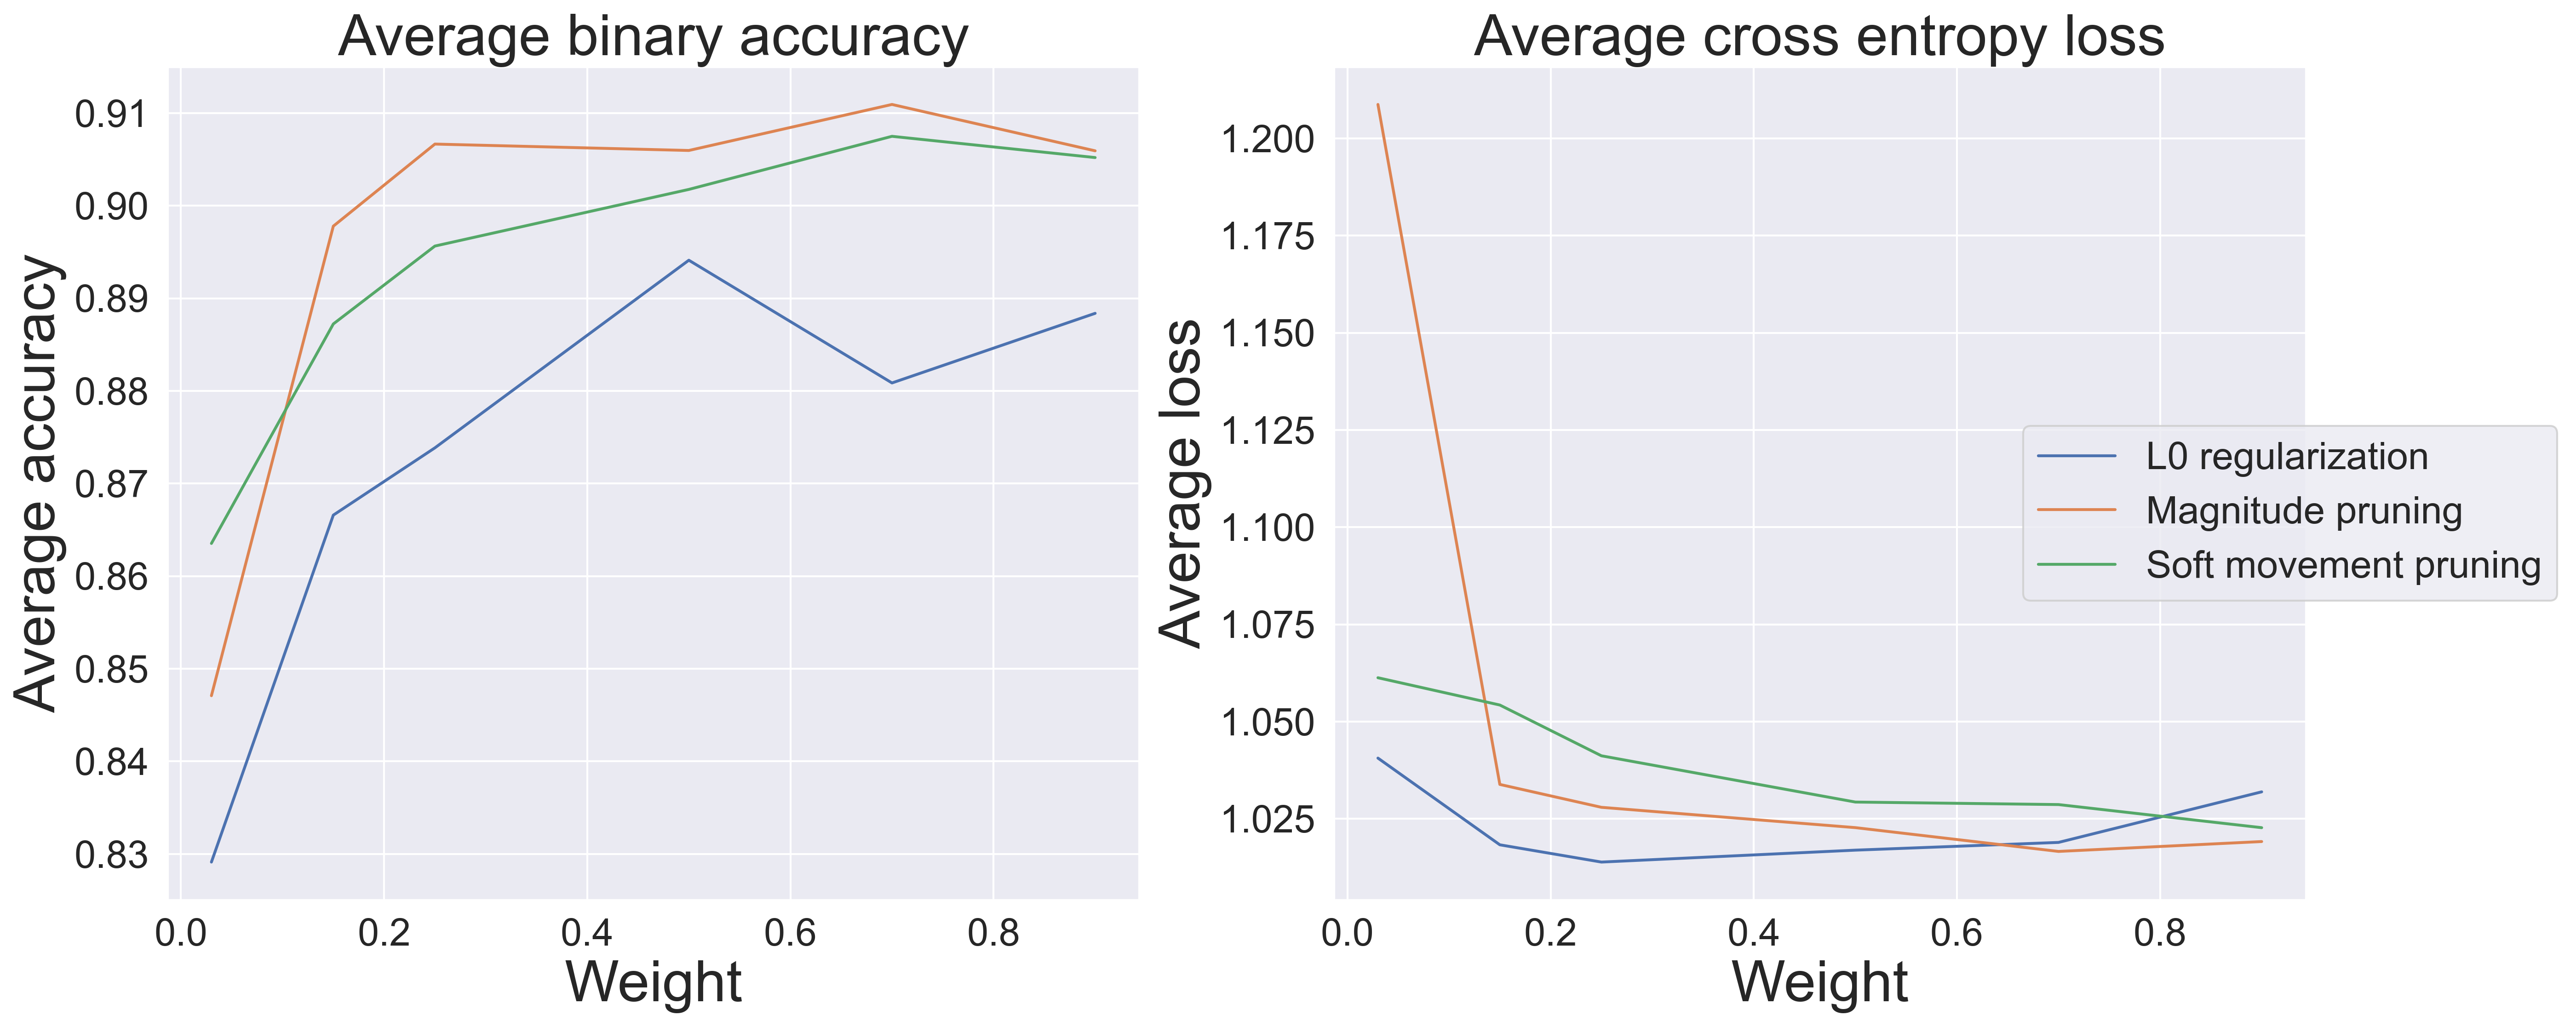

In [246]:
sns.set_theme(style="darkgrid")
methods = df.pruning_method.unique()
methods = np.delete(methods, np.where(methods == 'movement_pruning'))

fig, ax = plt.subplots(
    nrows = 1,
    ncols = 2,
    dpi=300
)
fig.set_size_inches(20,8)

for method in methods:

    weights = mean_df.loc[
        mean_df.pruning_method == method
    ]['weight']

    acc = mean_df.loc[
        mean_df.pruning_method == method
    ]['mean_accuracy']


    loss = mean_df.loc[
        mean_df.pruning_method == method
    ]['mean_loss']


    sns.lineplot(y=acc,x=weights,ax=ax[0]);
    sns.lineplot(y=loss,x=weights,ax=ax[1]);

ax[0].set_xlabel("Weight", fontsize=30);
ax[0].set_ylabel("Average accuracy", fontsize=30);

ax[1].set_xlabel("Weight", fontsize=30);
ax[1].set_ylabel("Average loss", fontsize=30);
fig.legend(
    labels=['L0 regularization','Magnitude pruning','Soft movement pruning'],
    fontsize=20,
    loc='right'
);
ax[0].tick_params(axis='both', which='major',labelsize=20);
ax[1].tick_params(axis='both', which='major',labelsize=20);

ax[0].set_title('Average binary accuracy',fontsize=30);
ax[1].set_title('Average cross entropy loss',fontsize=30);

In [247]:
fig.savefig('average_metrics_BERT',bbox_inches='tight')